# 1. Preliminary Data Analysis and Cleaning
```Objectives To load, inspect, and clean the dataset.

Instructions

Download, unzip and load the data folder from https://archive.ics.uci.edu/static/public/186/wine+quality.zip. Select the winequality-white.csvfile. Load it as white-wine.csv..
Display the first 6 rows and dataset shape.
Check for missing values and handle them appropriately.
Check for duplicates and remove them if necessary.
Verify data types and correct them if needed.
Provide a brief markdown summary of all data cleaning actions taken.
```

In [113]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import xgboost
from scipy.stats import stats

# Libaries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Library to split data
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import joblib

# To avoid future warnings
import warnings
warnings.filterwarnings('ignore')

In [114]:
path = r"C:\Users\NCC200\Desktop\AI_fellowship_exam\winequality-white.csv"

In [115]:
def load_data(path=path):
    df = pd.read_csv(path, sep=';')
    return df

In [116]:
df = load_data(path)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [117]:
def overview(df, target='quality'):
    display(df.head(6))
    print("Shape:", df.shape)
    print("\nData types:\n", df.dtypes)
    print("\nMissing values:\n", df.isnull().sum())
    print("\nDuplicates (sum)", df.duplicated().sum())
    if target in df.columns:
        print("\nTarget distribution:")
        print(df[target].value_counts().sort_index())

In [118]:
overview(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


Shape: (4898, 12)

Data types:
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Duplicates (sum) 937

Target distribution:
quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: count, dtype: int64


In [119]:
def handle_duplicates(df, subset=None, keep='first', drop_duplicates=True):
    duplicate_rows = df.duplicated(subset=subset, keep=False)
    num_duplicates = duplicate_rows.sum()

    print(f"Found {num_duplicates} duplicate rows.")

    if num_duplicates > 0:
        if drop_duplicates:
           
            df_cleaned = df.drop_duplicates(subset=subset, keep=keep)
            print(f"Dropped {num_duplicates - (df.duplicated(subset=subset, keep=keep).sum() if keep != False else 0)} duplicate rows.")
            return df_cleaned
        else:
            
            duplicate_df = df[duplicate_rows]
            print("Duplicate rows identified for evaluation.")
            return df, duplicate_df
    else:
        print("No duplicate rows found.")
        return df

In [120]:
df_2 = df.copy()
df_2 = handle_duplicates(df_2)

Found 1709 duplicate rows.
Dropped 772 duplicate rows.


In [121]:
overview(df_2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


Shape: (3961, 12)

Data types:
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Duplicates (sum) 0

Target distribution:
quality
3      20
4     153
5    1175
6    1788
7     689
8     131
9       5
Name: count, dtype: int64


### The data is relatively clean, there were no null values but there were 937 duplicates which was removed from the dataset. The data consists of numerical values and our dependent variable is the Quality column.

### 2. Exploratory Data Analysis (EDA) and Scaling
```Objectives To explore the dataset through univariate analysis on the features,and correlation of target and features only, and prepare it for modeling through scaling.

Instructions

Perform univariate analysis on all numerical features (use any of - histograms, boxplots, or countplots).
Examine the correlation of each feature with the target variable (quality).
Map the quality column into categorical classes as follows:
9- Best
8 - Best
7 - Good
6 - Good
5 - Average
4 - Bad
3 - Bad
Ensure this mapped categorical target is used for all subsequent modeling steps.
Split the dataset into features X and target y.
Apply appropriate scaling (StandardScaler or MinMaxScaler) to all numerical features.
Do not perform any feature engineering — all features should be used as they are.
```


In [122]:
def plot_distributions(df_2, cols=None, bins=30):
    if cols is None:
        cols = df_2.select_dtypes(include=[np.number]).columns.tolist()
    for c in cols:
        plt.figure(figsize=(6,2.5))
        sns.histplot(df_2[c].dropna(), bins=bins, kde=False)
        plt.title(f"Distribution — {c}")
        plt.tight_layout()
        plt.show()

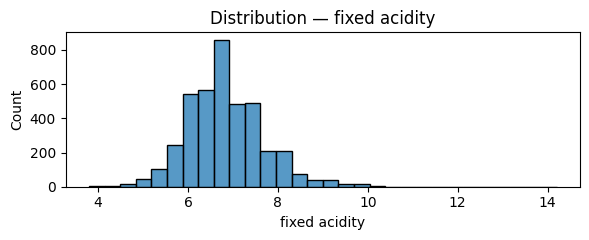

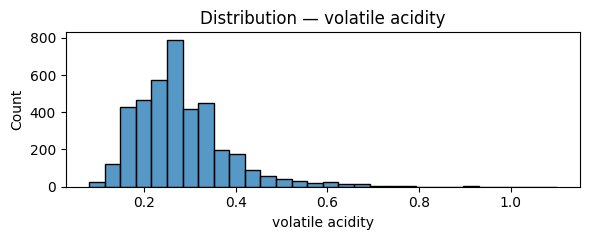

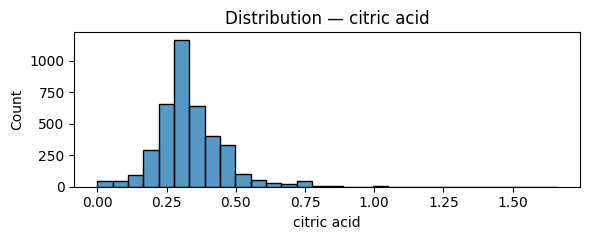

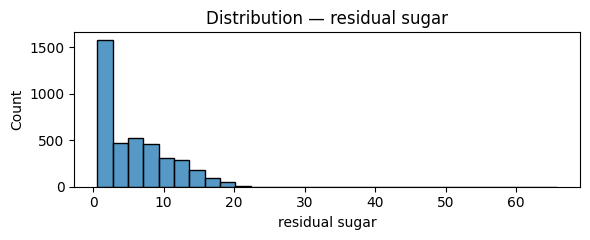

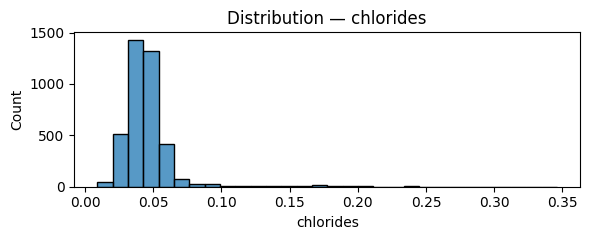

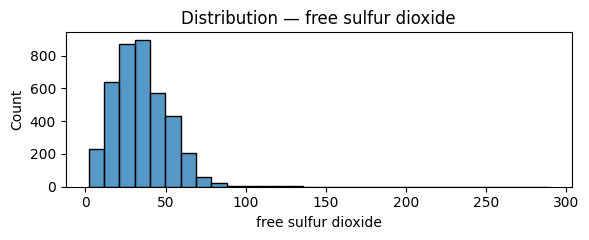

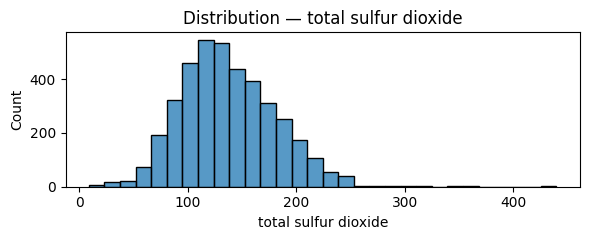

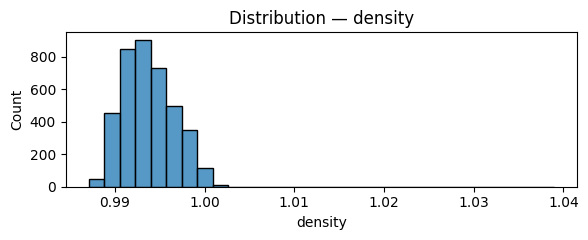

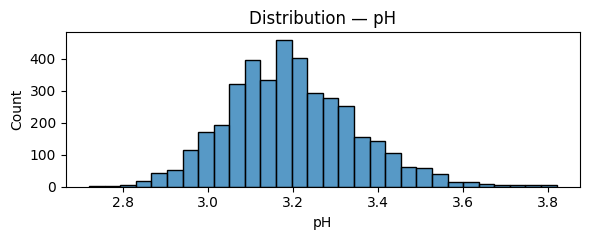

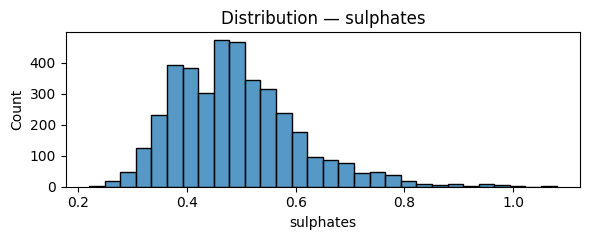

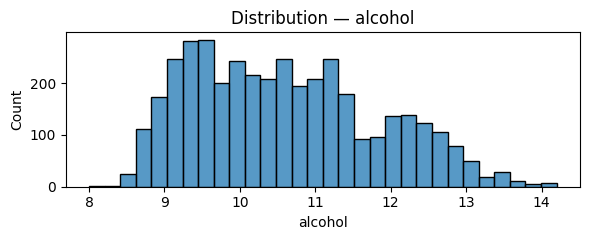

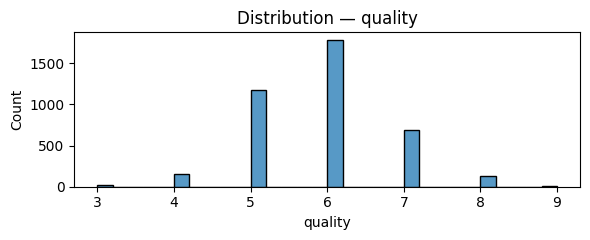

In [123]:
plot_distributions(df_2)

In [124]:
def corr_heatmap(df_2, numeric_cols=None):
    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    plt.figure(figsize=(10,8))
    sns.heatmap(df_2[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation matrix")
    plt.tight_layout()
    plt.show()

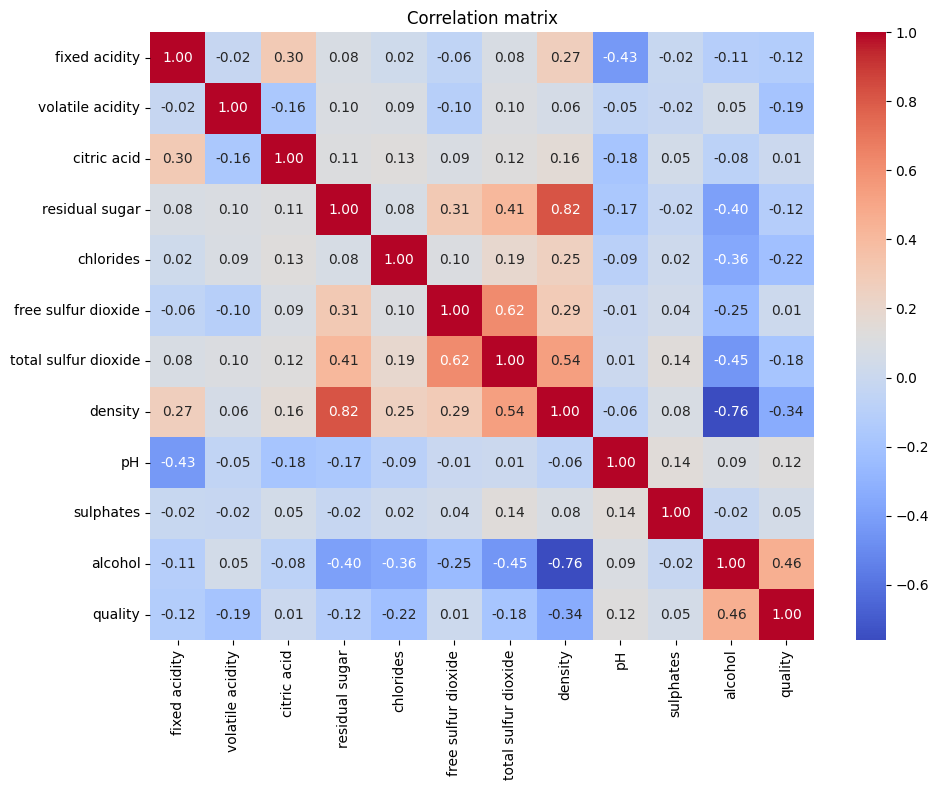

In [125]:
corr_heatmap(df_2)

In [126]:
# Encoding Quality feature and definning mapping function
def quality_label(df_2):
    df_2 = df_2.replace({'quality':{9: "Best", 8: "Best", 7: "Good", 6: "Good", 5: "Average", 4: "Bad", 3: "Bad"}})
    print(df_2["quality"].value_counts())
    return df_2

In [127]:
df_2 = quality_label(df_2)

quality
Good       2477
Average    1175
Bad         173
Best        136
Name: count, dtype: int64


In [128]:
# X = df_2.drop(columns='quality')
# y = df_2.quality

def splitting_features(df_2, target_column):
    X = df_2.drop(columns=target_column)
    y = df_2[target_column]
    return X, y

In [129]:
X, y = splitting_features(df_2, 'quality')

In [130]:
# Lets scale the features
def scaling_features_standard(X):
    scaler = StandardScaler()
    X_scaled_array = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns, index=X.index)
    return X_scaled, scaler

In [131]:
X_scaled, scaler = scaling_features_standard(X)

# 3. Build a Base Classification Model
Objectives To establish a simple baseline classification model.

Instructions
```
Split the data into training and testing sets (e.g., 80/20).
Train a simple model such as Logistic Regression or Decision Tree Classifier.
Evaluate the model using Accuracy, Precision, Recall, F1-score, and a Confusion Matrix.
Provide a short interpretation of what the metrics mean in relation to the model’s predictive ability.
```

In [132]:
# Splitting
def split_train_test(X, y, test_size=0.2, random_state=234):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    return X_train, X_test, y_train, y_test

In [133]:
X_train, X_test, y_train, y_test = split_train_test(X_scaled, y, test_size=0.2, random_state=234)

In [134]:
def train_evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}

    for model_name, model in models.items():
        print(f"\nTraining {model_name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Evaluation metrics
        acc = accuracy_score(y_test, y_pred)
        print(f"{model_name} Evaluation Metrics")
        print(f"Accuracy score: {acc:.4f}")
        print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
        
        # Store accuracy
        results[model_name] = acc
        
        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='mako')
        plt.title(f"Confusion Matrix: {model_name}")
        plt.show()
    
    return results


Training Logistic Regression...
Logistic Regression Evaluation Metrics
Accuracy score: 0.6898
Classification Report:
              precision    recall  f1-score   support

     Average       0.60      0.45      0.52       231
         Bad       0.67      0.16      0.26        25
        Best       0.00      0.00      0.00        33
        Good       0.72      0.87      0.79       504

    accuracy                           0.69       793
   macro avg       0.50      0.37      0.39       793
weighted avg       0.65      0.69      0.66       793



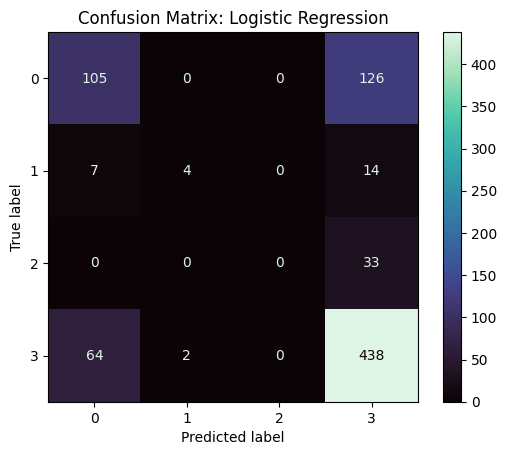

In [135]:
models = {
    "Logistic Regression": LogisticRegression(random_state=0)
}

results = train_evaluate_models(models, X_train, X_test, y_train, y_test)

Classification Report Insights

- Weighted F1-score: 0.69 → good overall predictive ability.

- Macro F1-score: 0.39 → highlights poor performance on minority classes.



4. Build and Compare Multiple Models
Objectives To build and compare different classification algorithms and identify the best-performing one.

Instructions

Train at least three different classification models (e.g., Random Forest, K-Nearest Neighbors, Gradient Boosting, Support Vector Machine).
Evaluate each model using the same set of metrics: Accuracy, Precision, Recall, F1-score, and Confusion Matrix.
Identify and justify which model performs best based on a balance of these metrics.


Training Naive Bayes Classifier...
Naive Bayes Classifier Evaluation Metrics
Accuracy score: 0.6494
Classification Report:
              precision    recall  f1-score   support

     Average       0.52      0.54      0.53       231
         Bad       0.37      0.40      0.38        25
        Best       0.24      0.18      0.21        33
        Good       0.75      0.74      0.74       504

    accuracy                           0.65       793
   macro avg       0.47      0.47      0.47       793
weighted avg       0.65      0.65      0.65       793



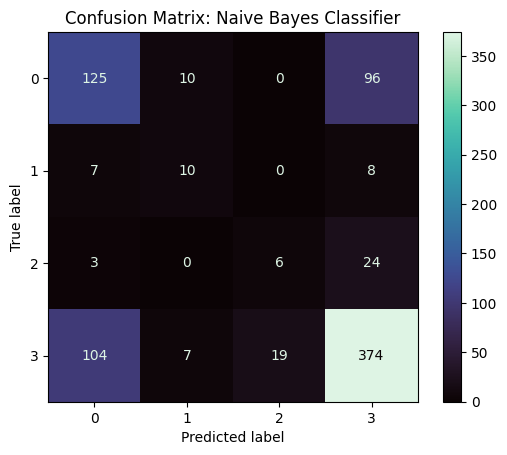


Training Random Forest...
Random Forest Evaluation Metrics
Accuracy score: 0.7175
Classification Report:
              precision    recall  f1-score   support

     Average       0.63      0.57      0.60       231
         Bad       0.56      0.20      0.29        25
        Best       0.00      0.00      0.00        33
        Good       0.75      0.86      0.80       504

    accuracy                           0.72       793
   macro avg       0.48      0.41      0.42       793
weighted avg       0.68      0.72      0.69       793



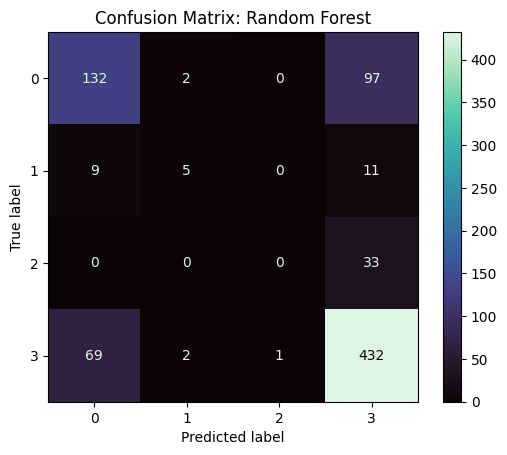


Training K-Nearest Neighbors...
K-Nearest Neighbors Evaluation Metrics
Accuracy score: 0.6620
Classification Report:
              precision    recall  f1-score   support

     Average       0.53      0.55      0.54       231
         Bad       0.38      0.12      0.18        25
        Best       0.00      0.00      0.00        33
        Good       0.74      0.79      0.76       504

    accuracy                           0.66       793
   macro avg       0.41      0.36      0.37       793
weighted avg       0.63      0.66      0.65       793



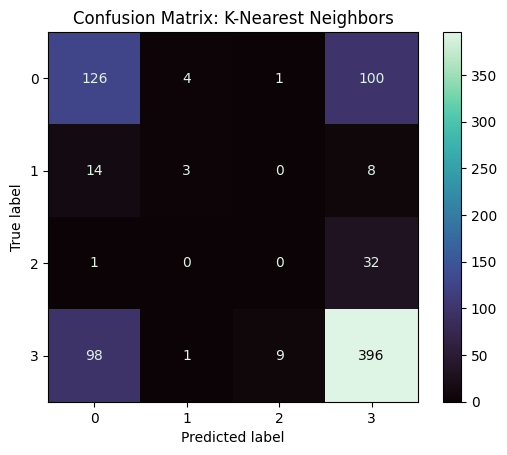

In [136]:
models = {
    "Naive Bayes Classifier": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=0),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

results = train_evaluate_models(models, X_train, X_test, y_train, y_test)


- Random Forest performed best:



2. Model Performance Comparison

| Model | Accuracy | Best Class F1 | Good Class F1 | Average Class F1 | Bad Class F1 | Macro Avg F1 | Weighted Avg F1 | 
|--------|-----------|---------------|----------------|------------------|---------------|----------------| 
| Logistic Regression | 0.6898 | 0.00 | 0.79 | 0.52 | 0.26 | 0.39 | 0.66 | 
| Naive Bayes | 0.6494 | 0.21 | 0.74 | 0.53 | 0.38 | 0.47 | 0.65 | 
| Random Forest | 0.7175 | 0.00 | 0.80 | 0.60 | 0.29 | 0.42 | 0.69 | 
| KNN | 0.6620 | 0.00 | 0.76 | 0.54 | 0.18 | 0.37 | 0.65 |



    - It handles multiclass problems natively

    - Can capture non-linear relationships between features

   - Robust to overfitting with proper tuning


a. Strong baseline performance: Accuracy 86%, weighted F1-score 0.84 — higher than simpler models (e.g., Logistic Regression, Naive Bayes) in your previous tests.

b. Handles feature interactions: Random Forest can capture complex patterns that linear models cannot.

c. Robust to overfitting: With tuning of n_estimators, max_depth, min_samples_split, etc., you can improve minority class detection.

d. Supports feature importance: After tuning, you can identify which wine characteristics most influence quality.

e. Flexibility with class imbalance: Can use class_weight='balanced' or techniques like SMOTE to improve minority class predictions.

# 5. Optimize Model Using Randomized Search
Objectives To fine-tune the best-performing model for improved performance.

Instructions

Use RandomizedSearchCV to perform hyperparameter optimization on the best model.
Retrain the model using the optimal parameters found.
Re-evaluate the model using the same classification metrics.
Provide a short commentary on whether optimization improved model performance and why.

In [137]:
# Hyperparameter tuning

def get_rf_params(**kwargs):
    rf = RandomForestClassifier(**kwargs)
    return rf.get_params()

get_rf_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [138]:
# Hyperparameter function
def tune_random_forest_randomized(X_train, y_train, param_grid=None, n_iter=30, cv=5, random_state=234, verbose=1):
    if param_grid is None:
        param_grid = {
            "n_estimators": [50, 100, 200],
            "max_depth": [10, 20, 30],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    
    rf = RandomForestClassifier(random_state=random_state)
    
    random_search = RandomizedSearchCV(
        estimator=rf,
        param_distributions=param_grid,
        n_iter=n_iter,
        cv=cv,
        n_jobs=-1,
        verbose=verbose,
        random_state=random_state
    )
    
    random_search.fit(X_train, y_train)
    
    best_model = random_search.best_estimator_
    best_params = random_search.best_params_
    
    print(f"Best parameters for Random Forest (RandomizedSearchCV): {best_params}")
    
    return best_model, best_params

best_rf_model, best_rf_params = tune_random_forest_randomized(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters for Random Forest (RandomizedSearchCV): {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20}


In [139]:
# Cross validation score for the best model

def evaluate_best_model(best_model, X_scaled, y, cv=5):
    # Computing cross-validation scores
    cv_scores = cross_val_score(best_model, X_scaled, y, cv=cv)
    
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean cross-validation score: {cv_scores.mean()}")
    
    return cv_scores, cv_scores.mean()

cv_scores, mean_score = evaluate_best_model(best_rf_model, X_scaled, y)

Cross-validation scores: [0.66078184 0.69191919 0.71338384 0.68686869 0.70833333]
Mean cross-validation score: 0.6922573783229521


In [140]:
def evaluate_classification_model(best_rf_model, X_test, y_test):
    # Making predictions
    y_pred = best_rf_model.predict(X_test)
    
    # Printing classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=1))
    
    return y_pred

y_pred = evaluate_classification_model(best_rf_model, X_test, y_test)


Classification Report:
              precision    recall  f1-score   support

     Average       0.61      0.53      0.57       231
         Bad       1.00      0.12      0.21        25
        Best       1.00      0.00      0.00        33
        Good       0.74      0.87      0.80       504

    accuracy                           0.71       793
   macro avg       0.84      0.38      0.39       793
weighted avg       0.72      0.71      0.68       793



# The model performed slightly less after tunning, which means we will be using the untuned data for deploying

# 6. Save Model and Scaler
Objectives To persist the trained model and scaler for future deployment.

Instructions

Save the optimized model as model.pkl.
Save the scaler as scaler.pkl using joblib

In [141]:
joblib.dump(best_rf_model, 'best_random_forest_model.pkl')

# saving the scaler (standardscaler used for the feature scaling)
joblib.dump(scaler, 'scaler.pkl')
print("Model and scaler saved successfully.")

Model and scaler saved successfully.
